### Imports

In [18]:
import sys
mypath = "/home/basia/Documents/spectroscopy/magnetstein"
sys.path.insert(0, mypath)

In [19]:
import numpy as np
import pandas as pd
import os
from masserstein import NMRSpectrum, estimate_proportions
import matplotlib.pyplot as plt
import pulp
import pickle

### Data

In [3]:
experiment_name = 'PMG 284 monitoring'

In [4]:
mixture_path = '../../data/PMG_284/284_edited.csv'

mixture_separator = '\t'

data_path = '../../data/PMG_284/'

#### Mixture in time

In [5]:
mixture_time_data = pd.read_csv(mixture_path, sep = mixture_separator).iloc[:,:-1]

In [6]:
mixture_time_data

,Unnamed: 0,seria1\nSTANDARD_PROTON_PARAMETERS\n_1,seria1\nSTANDARD_PROTON_PARAMETERS\n_2,seria1\nSTANDARD_PROTON_PARAMETERS\n_3,seria1\nSTANDARD_PROTON_PARAMETERS\n_4,seria1\nSTANDARD_PROTON_PARAMETERS\n_5,seria1\nSTANDARD_PROTON_PARAMETERS\n_6,seria1\nSTANDARD_PROTON_PARAMETERS\n_7,seria1\nSTANDARD_PROTON_PARAMETERS\n_8,seria1\nSTANDARD_PROTON_PARAMETERS\n_9,...,seria1\nSTANDARD_PROTON_PARAMETERS\n_991,seria1\nSTANDARD_PROTON_PARAMETERS\n_992,seria1\nSTANDARD_PROTON_PARAMETERS\n_993,seria1\nSTANDARD_PROTON_PARAMETERS\n_994,seria1\nSTANDARD_PROTON_PARAMETERS\n_995,seria1\nSTANDARD_PROTON_PARAMETERS\n_996,seria1\nSTANDARD_PROTON_PARAMETERS\n_997,seria1\nSTANDARD_PROTON_PARAMETERS\n_998,seria1\nSTANDARD_PROTON_PARAMETERS\n_999,seria1\nSTANDARD_PROTON_PARAMETERS\n_1000
0,-1.99017,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
1,-1.99005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1.98993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-1.98981,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-1.98969,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131572,14.01420,-0.001397,-0.001813,-0.001785,-0.001986,-0.001981,-0.001918,-0.001769,-0.001708,-0.001384,...,0.002463,0.003030,0.003146,0.002669,0.002829,0.003123,0.002936,NaN,NaN,NaN
131573,14.01430,-0.001397,-0.001813,-0.001785,-0.001986,-0.001981,-0.001918,-0.001769,-0.001708,-0.001384,...,0.002463,0.003030,0.003146,0.002669,0.002829,0.003123,0.002936,NaN,NaN,NaN
131574,14.01440,-0.001397,-0.001813,-0.001785,-0.001986,-0.001981,-0.001918,-0.001769,-0.001708,-0.001384,...,0.002463,0.003030,0.003146,0.002669,0.002829,0.003123,0.002936,NaN,NaN,NaN
131575,14.01460,-0.001397,-0.001813,-0.001785,-0.001986,-0.001981,-0.001918,-0.001769,-0.001708,-0.001384,...,0.002463,0.003030,0.003146,0.002669,0.002829,0.003123,0.002936,NaN,NaN,NaN


In [7]:
names = ['ppm'] + ['t' + str(nb) for nb in range(1, mixture_time_data.shape[1])]

In [8]:
mixture_time_data.columns = names

In [9]:
def load_spectrum(mixture_time_data, moment_of_time):
    ppm = mixture_time_data['ppm']
    intensity = mixture_time_data['t'+str(moment_of_time)]
    sp = NMRSpectrum(confs = list(zip(ppm, intensity)))
    return sp

In [10]:
%matplotlib notebook

<IPython.core.display.Javascript object>


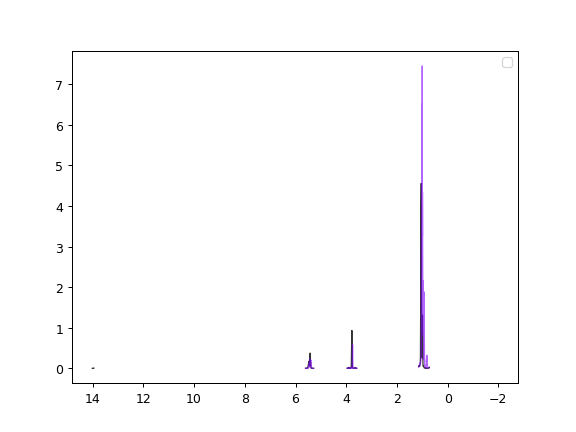

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [11]:
plt.gca().invert_xaxis()
NMRSpectrum.plot_all([load_spectrum(mixture_time_data, 1),
                     load_spectrum(mixture_time_data, 1000)], profile=True)

#### Reagents

In [12]:
reagents_sp = []

mix920 = pd.DataFrame(load_spectrum(mixture_time_data, 920).confs)

#2-pentene
reagent0 = mix920[mix920[0].apply(lambda x: (x>5.3 and x<5.6)
                                 )]
ppm = reagent0.iloc[:,0]
ints = reagent0.iloc[:,1]
reagents_sp.append(NMRSpectrum(confs = list(zip(ppm, ints))))



#triethylsilane                           
reagent1 = mix920[mix920[0].apply(lambda x: (x>3.6 and x<3.95)
                                 )]
ppm = reagent1.iloc[:,0]
ints = reagent1.iloc[:,1]
reagents_sp.append(NMRSpectrum(confs = list(zip(ppm, ints))))

#product                              
reagent2 = mix920[mix920[0].apply(lambda x: (x>0.76790933 and x<0.90286037) 
                                 )]
ppm = reagent2.iloc[:,0]
ints = reagent2.iloc[:,1]
reagents_sp.append(NMRSpectrum(confs = list(zip(ppm, ints))))

<IPython.core.display.Javascript object>


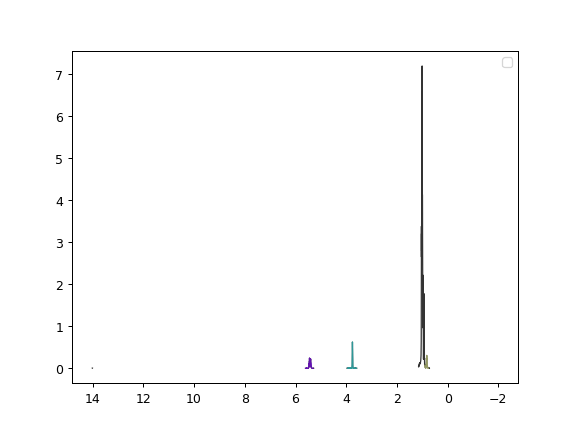

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [14]:
mix920_sp = load_spectrum(mixture_time_data, 920)
plt.gca().invert_xaxis()
#plt.xlim(1.8, 1.14)
NMRSpectrum.plot_all([mix920_sp] + reagents_sp, profile=True)

### Mixture

In [15]:
mixture_time_data = mixture_time_data[mixture_time_data['ppm'].apply(lambda x: 
                                                    (x>5.3 and x<5.6) or 
                                                    (x>3.6 and x<3.95) or 
                                                    (x>0.76790933 and x<0.90286037) 
                                 )]

<IPython.core.display.Javascript object>


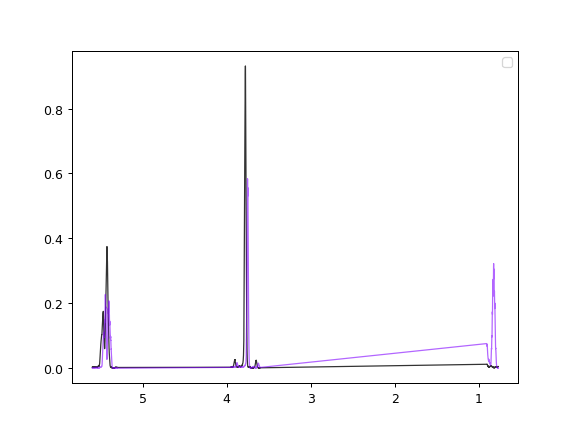

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [16]:
plt.gca().invert_xaxis()
NMRSpectrum.plot_all([load_spectrum(mixture_time_data, 1),
                 load_spectrum(mixture_time_data, 1000)], profile=True)

### Saving preprocessed spectra

In [17]:
np.savetxt(data_path + 'preprocessed_pentene.csv', reagent0, delimiter = '\t')
np.savetxt(data_path + 'preprocessed_triethylsilane.csv', reagent1, delimiter = '\t')
np.savetxt(data_path + 'preprocessed_product.csv', reagent2, delimiter = '\t')
np.savetxt(data_path + 'preprocessed_mixture.csv', mixture_time_data, delimiter = '\t')